<a href="https://colab.research.google.com/github/andrewburner/MSDS-485/blob/main/MSDS458_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.5.0'

In [2]:
tf.__version__

'2.5.0'

In [4]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [6]:
# To get consistint results each time we rerun the code.
keras.backend.clear_session()
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

**Experiment 1**

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

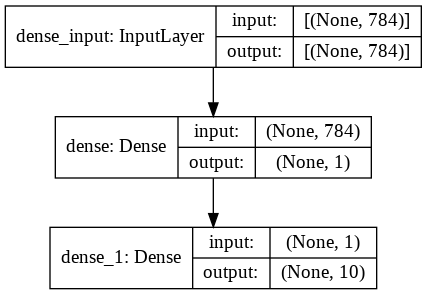

In [12]:
keras.utils.plot_model(model, "mnist_model_1hnode.png", show_shapes=True) # plot a graph of the model

In [13]:
model.summary() # prints a summary representation of the odel

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [14]:
# For use with non-categorical labels
model.compile(optimizer='rmsprop',           
# model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 41us/sample - loss: 1.9713 - accuracy: 0.2039 - val_loss: 1.8820 - val_accuracy: 0.2138
Epoch 2/30
   32/55000 [..............................] - ETA: 9s - loss: 1.8004 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 2s 33us/sample - loss: 1.8526 - accuracy: 0.2267 - val_loss: 1.8028 - val_accuracy: 0.2492
Epoch 3/30
55000/55000 [==============================] - 2s 34us/sample - loss: 1.7823 - accuracy: 0.2632 - val_loss: 1.7495 - val_accuracy: 0.3174
Epoch 4/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.7420 - accuracy: 0.2914 - val_loss: 1.7149 - val_accuracy: 0.3134
Epoch 5/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.7178 - accuracy: 0.3104 - val_loss: 1.6989 - val_accuracy: 0.3272
Epoch 6/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.7004 - accuracy: 0.3286 - val_loss: 1.6837 - val_accuracy: 0.3506
Epoch 7/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.6859 - accuracy: 0.3463 - val_loss: 1.6676 - val_accuracy: 0.3548
Epoch 8/30
55000/55000 [==============================] - 2s 34us/sample - loss: 1.6711 - accuracy: 0.3542 - val_loss

In [ ]:
train_time = end_time - start_time
print(f'training time: {train_time}')

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [17]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.3944000005722046, test loss: 1.584922840309143


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

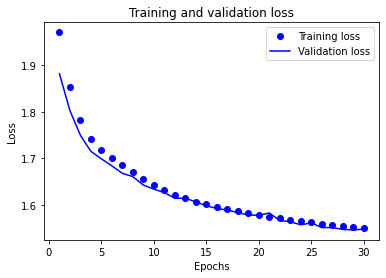

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

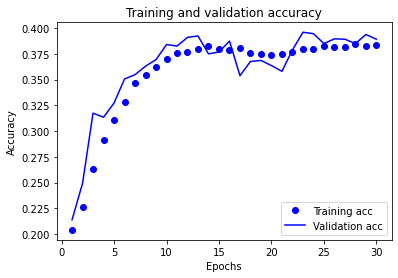

In [20]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

In [24]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[4333,    8,   67,   17,    0,  405,  567,    0,   47,    0],
       [  13, 5221,   22,  358,    0,   10,    6,    0,   66,  483],
       [ 501,  282,  995,  936,    0, 1123,  344,    6, 1272,   11],
       [  32, 1011,  620, 1853,    0,  372,   63,   54, 1459,  174],
       [  28, 1976,  238, 2022,    0,  153,   37,   42,  684,  127],
       [ 239,  166, 1080,  319,    0, 2021,  483,   38,  623,   18],
       [4118,    5,  114,   35,    0,  456,  635,    0,   54,    0],
       [   1,  959,   20,  118,    0,   14,    4, 3652,   35,  912],
       [  60,  732, 1113, 1171,    0,  744,  113,   11, 1410,   35],
       [  13, 2141,   32,  313,    0,   21,    9, 1545,  113, 1267]])

In [25]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

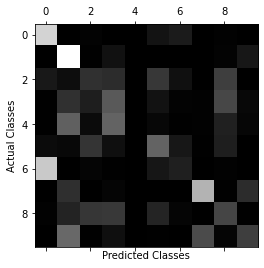

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

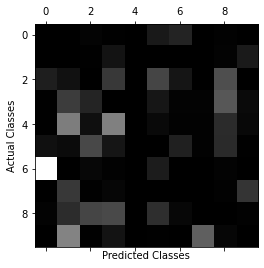

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

**Experiment 2**

In [32]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

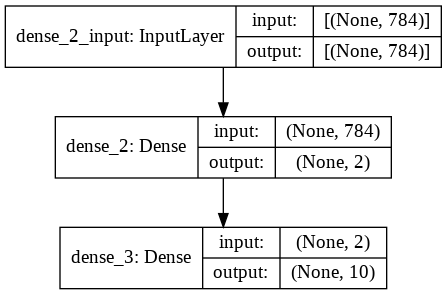

In [33]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [35]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [43]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.9271 - accuracy: 0.7017 - val_loss: 0.9193 - val_accuracy: 0.7116
Epoch 2/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.9266 - accuracy: 0.7007 - val_loss: 0.9227 - val_accuracy: 0.7104
Epoch 3/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.9266 - accuracy: 0.7011 - val_loss: 0.9200 - val_accuracy: 0.7086
Epoch 4/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.9263 - accuracy: 0.7015 - val_loss: 0.9197 - val_accuracy: 0.7152
Epoch 5/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.9258 - accuracy: 0.7010 - val_loss: 0.9238 - val_accuracy: 0.7102
Epoch 6/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.9263 - accuracy: 0.7020 - val_loss: 0.9203 - val_accuracy: 0.7168
Epoch 7/30
55000/55000 [==============================] -

In [44]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:09.074770


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [46]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.7052000164985657, test loss: 0.933592698097229


In [50]:
history_dict = history.history

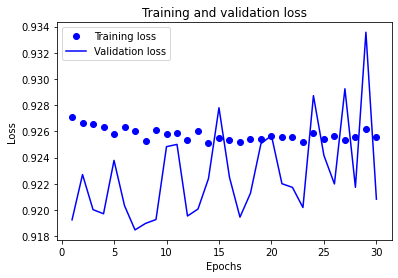

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

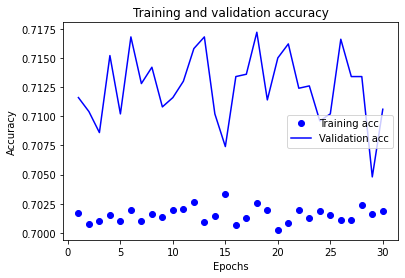

In [53]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [54]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [55]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[4265,   11,  549,  498,    2,   52,    8,    0,   58,    1],
       [   4, 5719,   69,    3,   84,    8,   86,    1,  194,   11],
       [ 425,  181, 3589,  141,   33,   82,  756,    8,  249,    6],
       [ 377,   15,  213, 3170,   13,  942,    7,  273,  580,   48],
       [   2,  309,   34,    2, 4372,    8,   19,    2,  156,  403],
       [  84,   57,  300, 1263,   31, 1396,   29,  317, 1463,   47],
       [   4,  251,  459,    5,   10,    7, 4617,    0,   64,    0],
       [   4,   26,   17,  229,  100,  324,    2, 4222,  306,  485],
       [  18,  462,  219,  328,  157,  561,   32,  232, 3262,  118],
       [   5,   19,   13,   55,  569,   91,    1,  458,  215, 4028]])

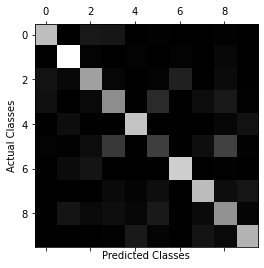

In [56]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [57]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

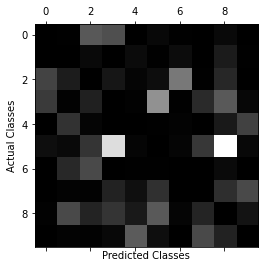

In [58]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3**

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

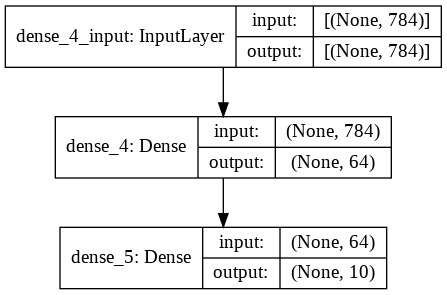

In [60]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [61]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [62]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54880/55000 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.9114

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 4s 70us/sample - loss: 0.3137 - accuracy: 0.9116 - val_loss: 0.1775 - val_accuracy: 0.9490
Epoch 2/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.1642 - accuracy: 0.9521 - val_loss: 0.1329 - val_accuracy: 0.9644
Epoch 3/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.1241 - accuracy: 0.9636 - val_loss: 0.1200 - val_accuracy: 0.9650
Epoch 4/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.1014 - accuracy: 0.9705 - val_loss: 0.1095 - val_accuracy: 0.9668
Epoch 5/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.0873 - accuracy: 0.9749 - val_loss: 0.1000 - val_accuracy: 0.9718
Epoch 6/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.1021 - val_accuracy: 0.9728
Epoch 7/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.0697 - accuracy: 0.9801 - val_loss

In [63]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:46.812564


In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [65]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9710999727249146, test loss: 0.1648134328031766


In [66]:
history_dict = history.history

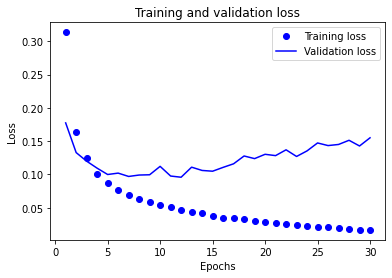

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

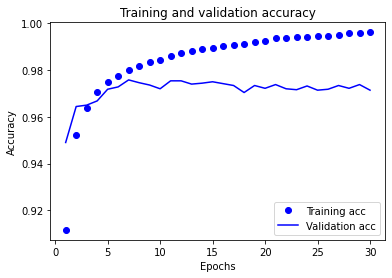

In [68]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [69]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [70]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5433,    0,    2,    0,    0,    0,    0,    0,    8,    1],
       [   0, 6164,    6,    2,    1,    0,    0,    3,    3,    0],
       [   0,    1, 5462,    1,    0,    0,    0,    3,    3,    0],
       [   0,    0,    5, 5627,    0,    0,    0,    3,    2,    1],
       [   0,    1,    1,    0, 5302,    0,    1,    1,    0,    1],
       [   0,    0,    2,   38,    1, 4914,    5,    1,   22,    4],
       [   2,    0,    0,    0,    0,    2, 5407,    0,    6,    0],
       [   1,    2,    2,    0,    0,    0,    0, 5707,    1,    2],
       [   0,    4,    3,    1,    2,    0,    0,    3, 5376,    0],
       [   1,    0,    0,    3,    8,    1,    0,   12,    5, 5424]])

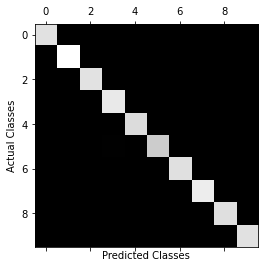

In [71]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [72]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

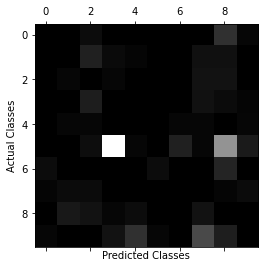

In [73]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()



```
# This is formatted as code
```

# **Experiment 3 - 128 nodes**

In [74]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

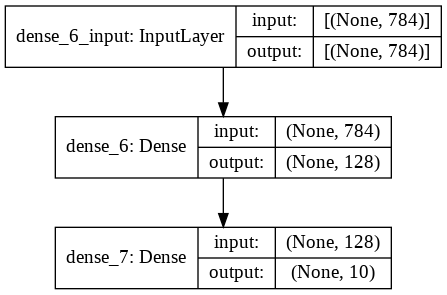

In [75]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [76]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [77]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2685 - accuracy: 0.9227 - val_loss: 0.1399 - val_accuracy: 0.9616


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.1260 - accuracy: 0.9628 - val_loss: 0.1049 - val_accuracy: 0.9704
Epoch 3/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0916 - accuracy: 0.9728 - val_loss: 0.1020 - val_accuracy: 0.9720
Epoch 4/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0734 - accuracy: 0.9787 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 5/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0617 - accuracy: 0.9829 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 6/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.0527 - accuracy: 0.9854 - val_loss: 0.0856 - val_accuracy: 0.9770
Epoch 7/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.0460 - accuracy: 0.9873 - val_loss: 0.0803 - val_accuracy: 0.9804
Epoch 8/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.0401 - accuracy: 0.9888

In [78]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:02:31.373104


In [79]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [80]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9779000282287598, test loss: 0.15685394153668494


In [81]:
history_dict = history.history

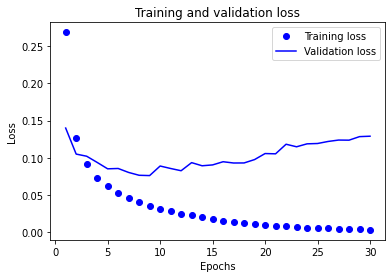

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

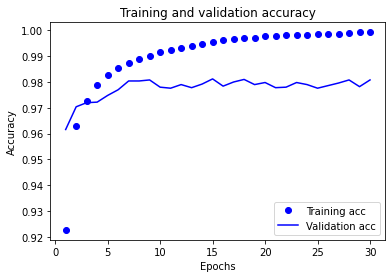

In [83]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [84]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [85]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5443,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6176,    0,    0,    1,    0,    0,    0,    2,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1, 5635,    0,    1,    0,    0,    0,    1],
       [   0,    1,    0,    0, 5304,    0,    1,    1,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0, 5714,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0,    0, 5387,    0],
       [   1,    0,    0,    0,    2,    0,    0,    4,    1, 5446]])

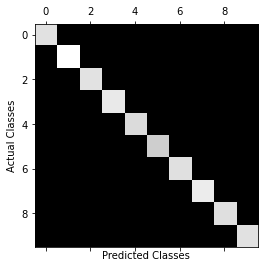

In [86]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [87]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

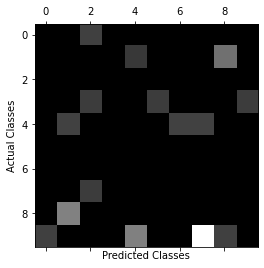

In [88]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3 - 256 nodes**

In [89]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

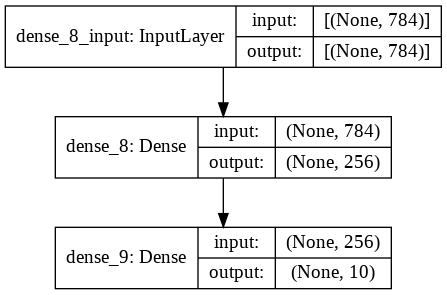

In [90]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [91]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [92]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54752/55000 [============================>.] - ETA: 0s - loss: 0.2358 - accuracy: 0.9309

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 8s 137us/sample - loss: 0.2355 - accuracy: 0.9310 - val_loss: 0.1274 - val_accuracy: 0.9618
Epoch 2/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.1050 - accuracy: 0.9691 - val_loss: 0.0844 - val_accuracy: 0.9736
Epoch 3/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.0769 - accuracy: 0.9778 - val_loss: 0.0809 - val_accuracy: 0.9780
Epoch 4/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.0605 - accuracy: 0.9827 - val_loss: 0.0808 - val_accuracy: 0.9774
Epoch 5/30
55000/55000 [==============================] - 8s 140us/sample - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 6/30
55000/55000 [==============================] - 7s 134us/sample - loss: 0.0403 - accuracy: 0.9890 - val_loss: 0.0882 - val_accuracy: 0.9774
Epoch 7/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.0335 - accuracy: 0.9906 - v

In [93]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:03:47.116609


In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [95]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9807000160217285, test loss: 0.17539621745624587


In [96]:
history_dict = history.history

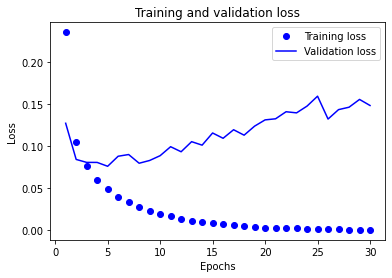

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

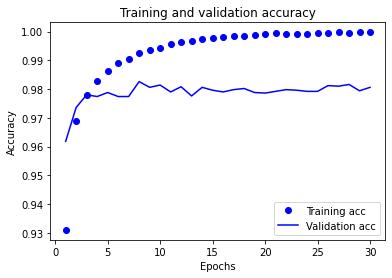

In [98]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [100]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6179,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5638,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5306,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5389,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5454]])

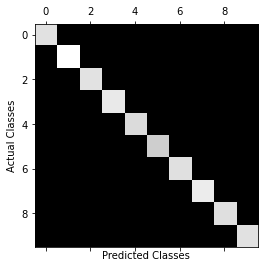

In [101]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [102]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

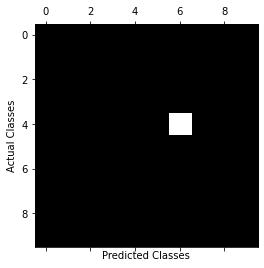

In [103]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3 - 512 nodes**

In [104]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

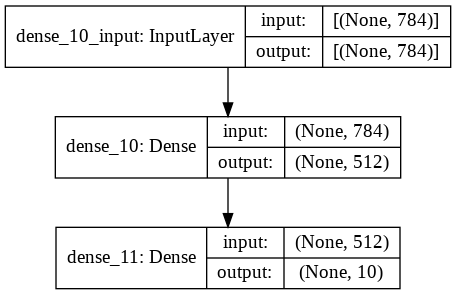

In [105]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [106]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [107]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54784/55000 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9380

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 12s 219us/sample - loss: 0.2092 - accuracy: 0.9381 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 2/30
55000/55000 [==============================] - 12s 210us/sample - loss: 0.0949 - accuracy: 0.9726 - val_loss: 0.0841 - val_accuracy: 0.9764
Epoch 3/30
55000/55000 [==============================] - 12s 211us/sample - loss: 0.0683 - accuracy: 0.9807 - val_loss: 0.0837 - val_accuracy: 0.9786
Epoch 4/30
55000/55000 [==============================] - 12s 212us/sample - loss: 0.0514 - accuracy: 0.9853 - val_loss: 0.0836 - val_accuracy: 0.9770
Epoch 5/30
55000/55000 [==============================] - 12s 216us/sample - loss: 0.0415 - accuracy: 0.9888 - val_loss: 0.0839 - val_accuracy: 0.9792
Epoch 6/30
55000/55000 [==============================] - 12s 218us/sample - loss: 0.0336 - accuracy: 0.9909 - val_loss: 0.0906 - val_accuracy: 0.9784
Epoch 7/30
55000/55000 [==============================] - 12s 221us/sample - loss: 0.0270 - accuracy: 0.9

In [108]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:06:00.177791


In [109]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [110]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9817000031471252, test loss: 0.18769141813024048


In [111]:
history_dict = history.history

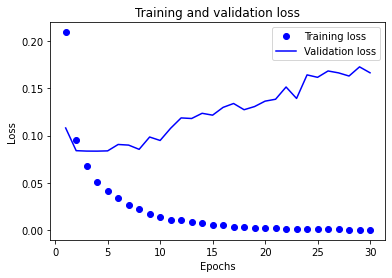

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

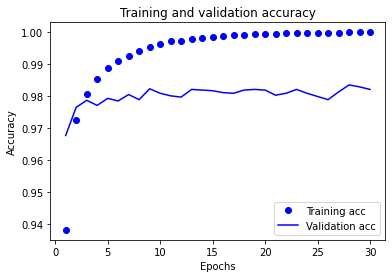

In [113]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [114]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [115]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6176,    0,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5635,    0,    0,    0,    0,    3,    0],
       [   0,    0,    0,    0, 5307,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5389,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5454]])

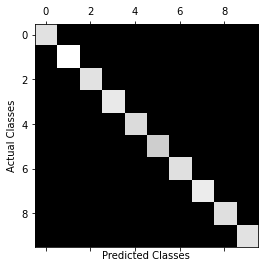

In [116]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [117]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

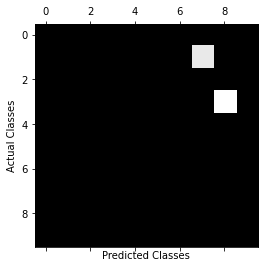

In [118]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 4 - PCA**

In [120]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=0.95)
train_images_red = pca.fit_transform(train_images)
val_images_red = pca.transform(val_images)
test_images_red = pca.transform(test_images)

In [134]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(154,)))
model.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


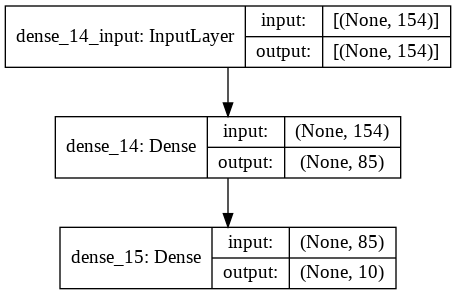

In [135]:
keras.utils.plot_model(model, "mnist_model_1hnode.png", show_shapes=True)

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 85)                13175     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                860       
Total params: 14,035
Trainable params: 14,035
Non-trainable params: 0
_________________________________________________________________


In [137]:
start_time = datetime.now()
history = model.fit(train_images_red, train_labels, epochs=30,
                    validation_data=(val_images_red, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54080/55000 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.9050

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 3s 49us/sample - loss: 0.3468 - accuracy: 0.9055 - val_loss: 0.1603 - val_accuracy: 0.9544
Epoch 2/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.1379 - accuracy: 0.9603 - val_loss: 0.1203 - val_accuracy: 0.9670
Epoch 3/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.0989 - accuracy: 0.9720 - val_loss: 0.1029 - val_accuracy: 0.9686
Epoch 4/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.0758 - accuracy: 0.9785 - val_loss: 0.0938 - val_accuracy: 0.9724
Epoch 5/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.0615 - accuracy: 0.9824 - val_loss: 0.0877 - val_accuracy: 0.9760
Epoch 6/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.0509 - accuracy: 0.9859 - val_loss: 0.0845 - val_accuracy: 0.9768
Epoch 7/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.0423 - accuracy: 0.9879 - val_loss

In [138]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:20.712081


In [139]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [140]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 0.9999, val acc: 0.976,
loss: 0.001122, val loss: 0.163


In [142]:
test_loss, test_acc = model.evaluate(test_images_red, test_labels)

In [143]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9743000268936157, test loss: 0.16992769943412478


In [144]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

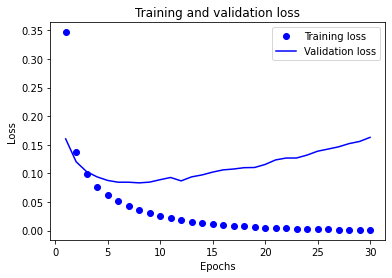

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

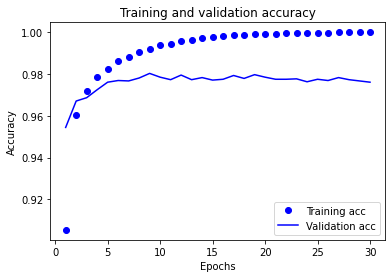

In [146]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Experiment 5 - Random Forest**

In [147]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(train_images,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

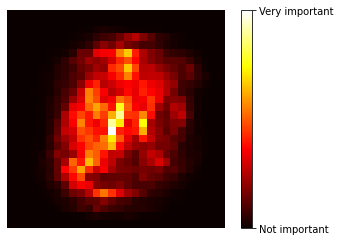

In [148]:
# https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# plt.savefig("mnist_feature_importance_plot")
plt.show()

In [149]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [150]:
train_images_sm = train_images[:,idx]
val_images_sm = val_images[:,idx]
test_images_sm = test_images[:,idx]
train_images_sm.shape, val_images.shape, test_images_sm.shape

((55000, 70), (5000, 784), (10000, 70))

In [151]:
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

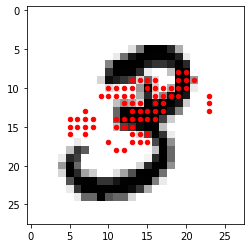

In [152]:
plt.imshow(train_images[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [154]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(70,)))
model.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [156]:
start_time = datetime.now()
history = model.fit(train_images_sm, train_labels, epochs=30,
                    validation_data=(val_images_sm, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54624/55000 [============================>.] - ETA: 0s - loss: 0.6282 - accuracy: 0.8134

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 3s 48us/sample - loss: 0.6273 - accuracy: 0.8138 - val_loss: 0.4458 - val_accuracy: 0.8738
Epoch 2/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4205 - accuracy: 0.8729 - val_loss: 0.3710 - val_accuracy: 0.8926
Epoch 3/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3518 - accuracy: 0.8950 - val_loss: 0.3242 - val_accuracy: 0.9066
Epoch 4/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3107 - accuracy: 0.9069 - val_loss: 0.3014 - val_accuracy: 0.9120
Epoch 5/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.2832 - accuracy: 0.9144 - val_loss: 0.2829 - val_accuracy: 0.9176
Epoch 6/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.2639 - accuracy: 0.9198 - val_loss: 0.2732 - val_accuracy: 0.9200
Epoch 7/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.2498 - accuracy: 0.9244 - val_loss

In [157]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:16.140374


In [158]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [159]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 0.9499, val acc: 0.935,
loss: 0.168, val loss: 0.2355


In [160]:
test_loss, test_acc = model.evaluate(test_images_sm, test_labels)

In [161]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9363999962806702, test loss: 0.23351904299650342


In [162]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

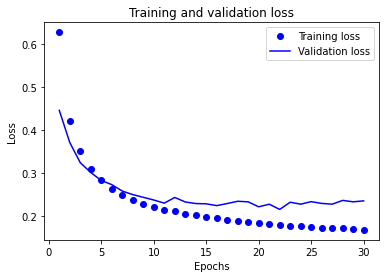

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

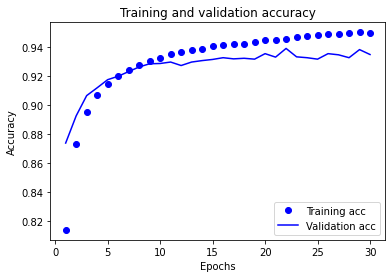

In [164]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Experiment 6 - tanh activation**

In [165]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

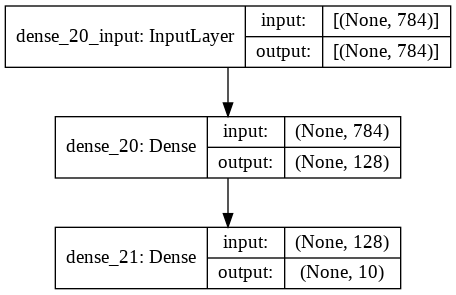

In [166]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [167]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [168]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54624/55000 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.9144

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 6s 109us/sample - loss: 0.2949 - accuracy: 0.9147 - val_loss: 0.1606 - val_accuracy: 0.9528
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.1478 - accuracy: 0.9562 - val_loss: 0.1133 - val_accuracy: 0.9662
Epoch 3/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.1053 - accuracy: 0.9686 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 4/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.0834 - accuracy: 0.9758 - val_loss: 0.0870 - val_accuracy: 0.9738
Epoch 5/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0868 - val_accuracy: 0.9734
Epoch 6/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.0854 - val_accuracy: 0.9730
Epoch 7/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.0503 - accuracy: 0.9854 - v

In [169]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:02:52.572730


In [170]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [171]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9761000275611877, test loss: 0.10982568396519404


In [172]:
history_dict = history.history

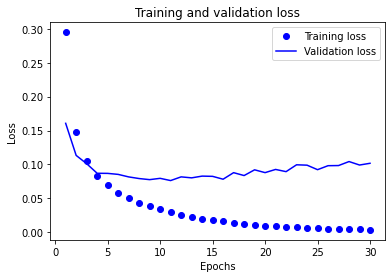

In [173]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

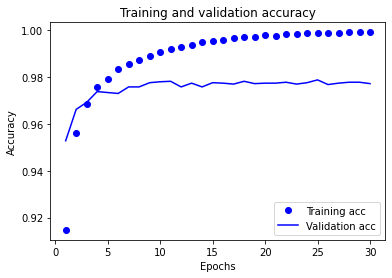

In [174]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [175]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [176]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5443,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 6178,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    1, 5467,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    0, 5636,    0,    0,    0,    1,    0,    1],
       [   0,    1,    0,    0, 5303,    0,    1,    1,    0,    1],
       [   0,    1,    0,    1,    0, 4983,    0,    0,    2,    0],
       [   1,    0,    0,    0,    1,    0, 5415,    0,    0,    0],
       [   0,    9,    1,    0,    0,    0,    0, 5704,    0,    1],
       [   0,    2,    0,    1,    0,    0,    1,    0, 5385,    0],
       [   1,    1,    0,    0,    2,    0,    0,    2,    1, 5447]])

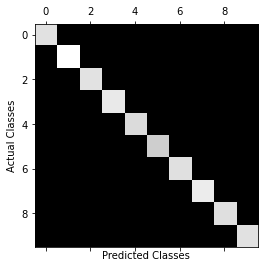

In [177]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [178]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

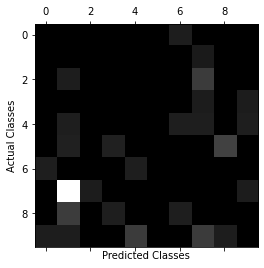

In [179]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 7 - Adam optimization**

In [180]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

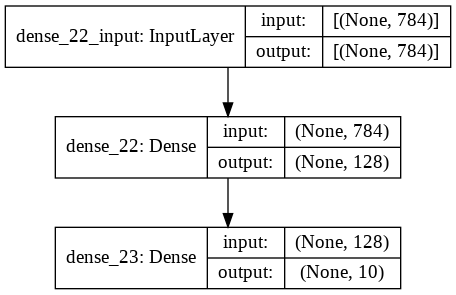

In [181]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [182]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [183]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - ETA: 0s - loss: 0.2706 - accuracy: 0.9222

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 5s 85us/sample - loss: 0.2706 - accuracy: 0.9222 - val_loss: 0.1424 - val_accuracy: 0.9608
Epoch 2/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.1191 - accuracy: 0.9657 - val_loss: 0.1024 - val_accuracy: 0.9722
Epoch 3/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.0832 - accuracy: 0.9753 - val_loss: 0.0885 - val_accuracy: 0.9718
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.0793 - val_accuracy: 0.9758
Epoch 5/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0757 - val_accuracy: 0.9760
Epoch 6/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 7/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.0303 - accuracy: 0.9906 - val_loss

In [184]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:02:10.928955


In [185]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [186]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9775000214576721, test loss: 0.13762643118684342


In [187]:
history_dict = history.history

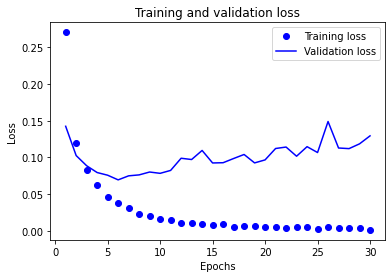

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

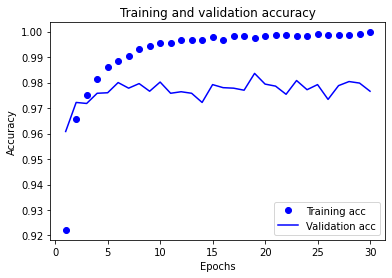

In [189]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [190]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [191]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5442,    0,    0,    0,    0,    0,    2,    0,    0,    0],
       [   0, 6169,    0,    0,    2,    1,    0,    7,    0,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5638,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5306,    0,    0,    0,    0,    1],
       [   0,    0,    0,    2,    0, 4985,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    1,    1,    2,    0,    0,    1,    1, 5383,    0],
       [   0,    0,    0,   23,   34,    0,    0,   18,    1, 5378]])

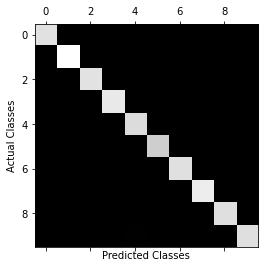

In [192]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [193]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

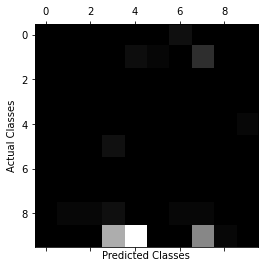

In [194]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()